# Sieci Kohonena

Zadanie do wykonania:
 - Prosze przeprowadzic grupowanie danych dotyczacych posiadaczy kart kredytowych z wykorzystaniem sieci Kohonena. 
 - Nalezy przeanalizowac istotnosc zmiennych, dobrac odpowiednia wielkosc modelu i wybrac odpowiednia ilosc grup.
 - Najpierw należy zastosować uczenie nienadzorowane, a następnie półnadzorowane

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases 
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user

Wczytanie danych

In [1]:
library("kohonen")
data<-read.csv("CC_GENERAL.csv", header=TRUE)
head(data)

Warning message:
"pakiet 'kohonen' został zbudowany w wersji R 4.3.3"


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,C10001,40.90075,0.818182,95.40,0.00,95.40,0.000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.5098,0.000000,12
2,C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.945,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.3402,0.222222,12
3,C10003,2495.14886,1.000000,773.17,773.17,0.00,0.000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.2848,0.000000,12
4,C10004,1666.67054,0.636364,1499.00,1499.00,0.00,205.788,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,NA,0.000000,12
5,C10005,817.71434,1.000000,16.00,16.00,0.00,0.000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.7912,0.000000,12
6,C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.2460,0.000000,12


Standaryzacja danych

In [2]:
data$CUST_ID<-NULL
data$MINIMUM_PAYMENTS[is.na(data$MINIMUM_PAYMENTS)] <- 0
data_scaled <- scale(data, center = TRUE, scale = TRUE)
data_scaled <- na.omit(data_scaled)

In [3]:
summary(data_scaled)

    BALANCE          BALANCE_FREQUENCY     PURCHASES         ONEOFF_PURCHASES  
 Min.   :-0.751598   Min.   :-3.703064   Min.   :-0.469526   Min.   :-0.35691  
 1st Qu.:-0.689929   1st Qu.: 0.049042   1st Qu.:-0.450898   1st Qu.:-0.35691  
 Median :-0.331868   Median : 0.518055   Median :-0.300339   Median :-0.33402  
 Mean   : 0.000083   Mean   : 0.000335   Mean   : 0.000052   Mean   : 0.00004  
 3rd Qu.: 0.235355   3rd Qu.: 0.518055   3rd Qu.: 0.050062   3rd Qu.:-0.00880  
 Max.   : 8.397019   Max.   : 0.518055   Max.   :22.482254   Max.   :24.19971  
 INSTALLMENTS_PURCHASES  CASH_ADVANCE       PURCHASES_FREQUENCY 
 Min.   :-0.454551      Min.   :-0.466759   Min.   :-1.2216898  
 1st Qu.:-0.454551      1st Qu.:-0.466759   1st Qu.:-1.0140688  
 Median :-0.356136      Median :-0.466759   Median : 0.0240412  
 Mean   : 0.000051      Mean   : 0.000042   Mean   : 0.0001365  
 3rd Qu.: 0.063673      3rd Qu.: 0.064371   3rd Qu.: 1.0621513  
 Max.   :24.425524      Max.   :22.009887   Max.  

Wykonanie modelu ninadzorowanego sieci kohonena

Podział zbioru na dane uczące i testowe

In [4]:
set.seed(123)
train_indices <- sample(seq_len(nrow(data_scaled)), size = 0.7 * nrow(data_scaled))
train_data <- data_scaled[train_indices, ]
test_data <- data_scaled[-train_indices, ]
row.names(train_data) <- NULL
row.names(test_data) <- NULL

In [5]:
som_grid <- somgrid(xdim = 30, ydim = 30, topo = "hexagonal")

In [15]:
som_model <- som(train_data, grid = som_grid, rlen = 500,alpha=c(0.05,0.01,0.009),keep.data = TRUE)

In [16]:
summary(som_model)

SOM of size 30x30 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 6264 objects.
Mean distance to the closest unit in the map: 1.505.


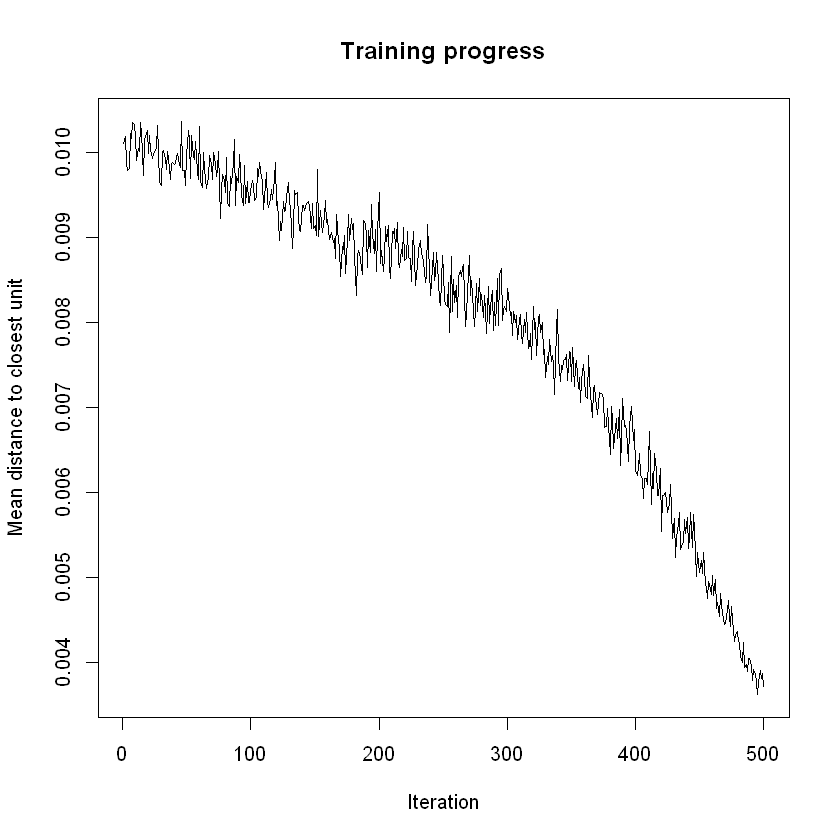

In [17]:
plot(som_model, type="changes")


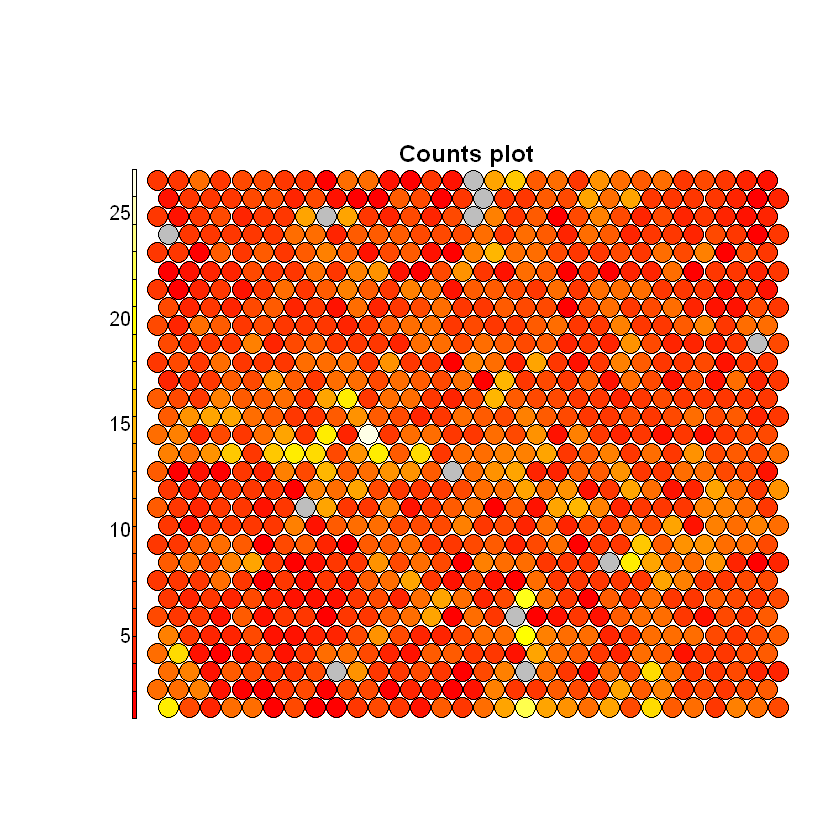

In [19]:
plot(som_model, type="count")

Wykres przedstawia ilości przypisanych obserwacji do danego neuronu

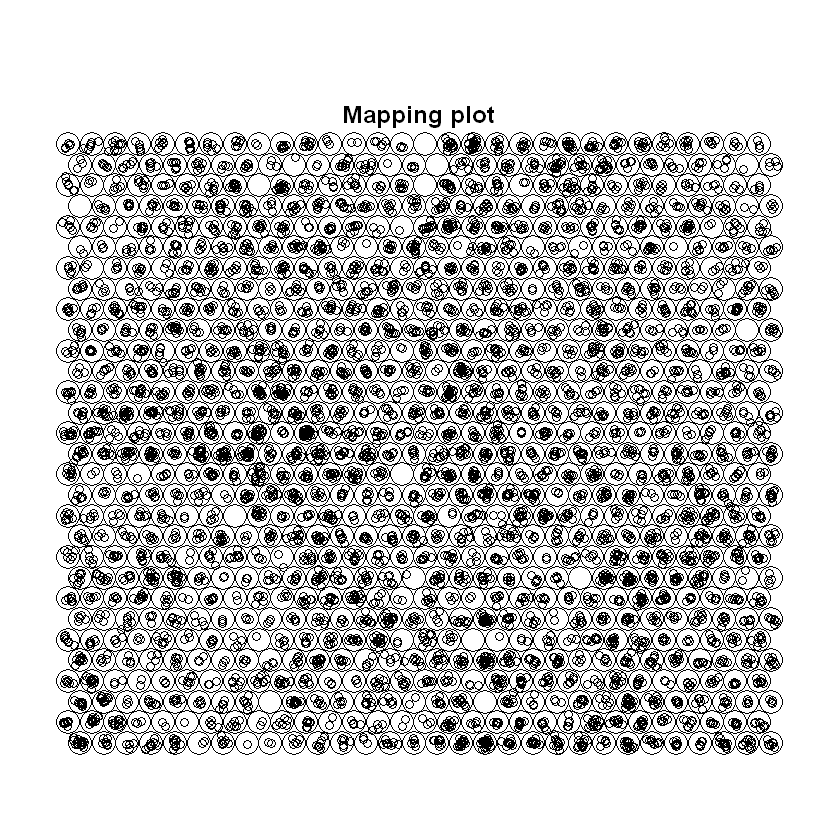

In [20]:
plot(som_model, type="mapping")

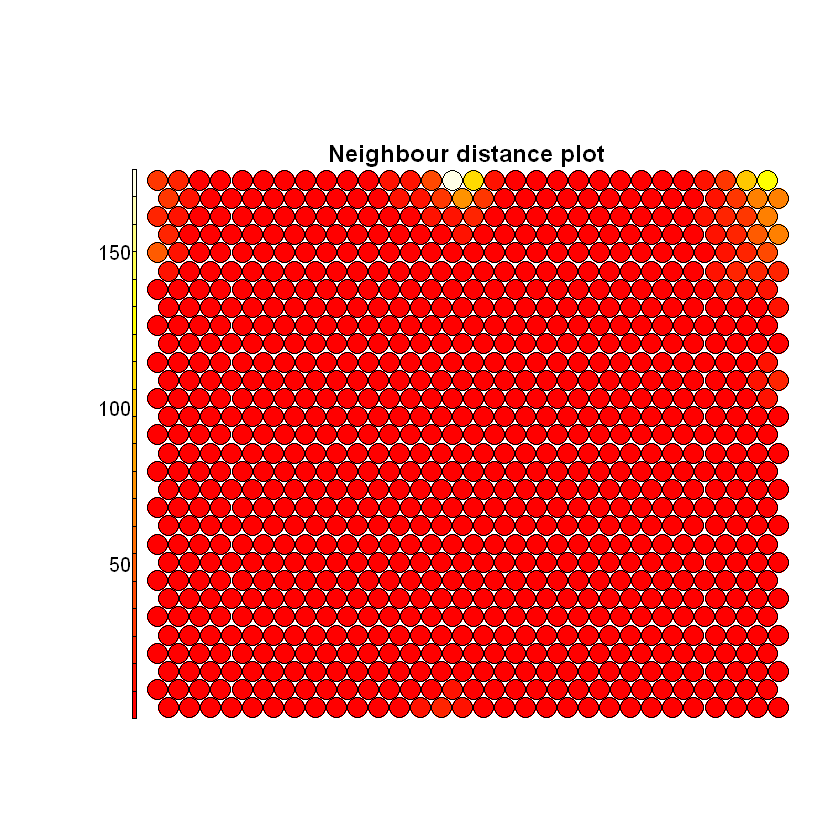

In [22]:
plot(som_model, type="dist.neighbours")

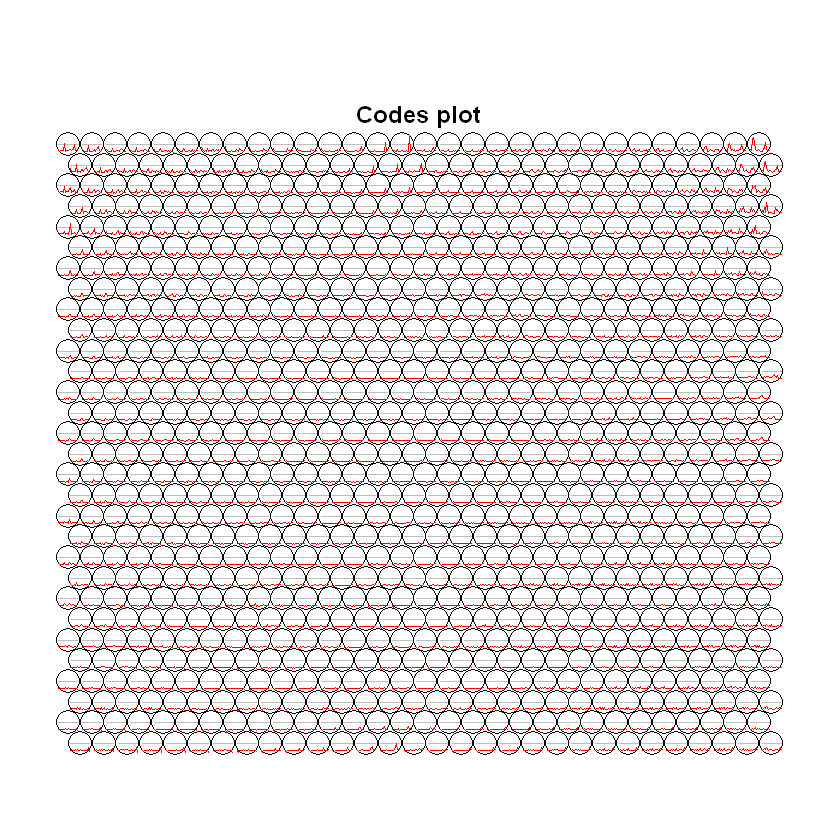

In [23]:
plot(som_model, type="codes")

Wybieram ilość klastrów na podstawie metody łokcia

Ładowanie wymaganego pakietu: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



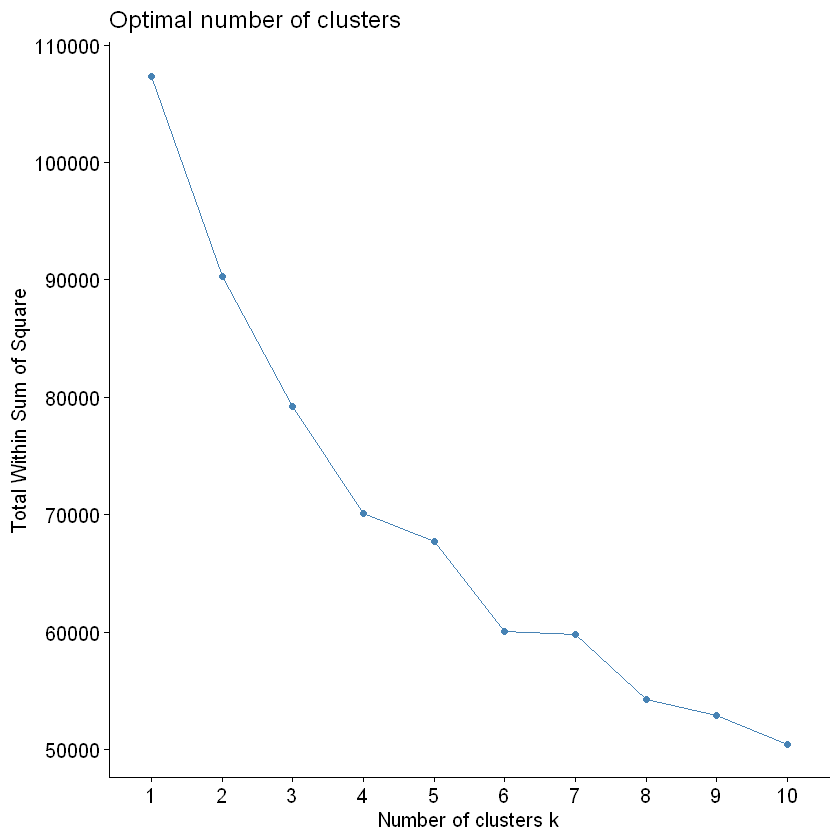

In [25]:
library(factoextra)
fviz_nbclust(train_data, kmeans, method = "wss")

Wizualizacja podziału na klastry

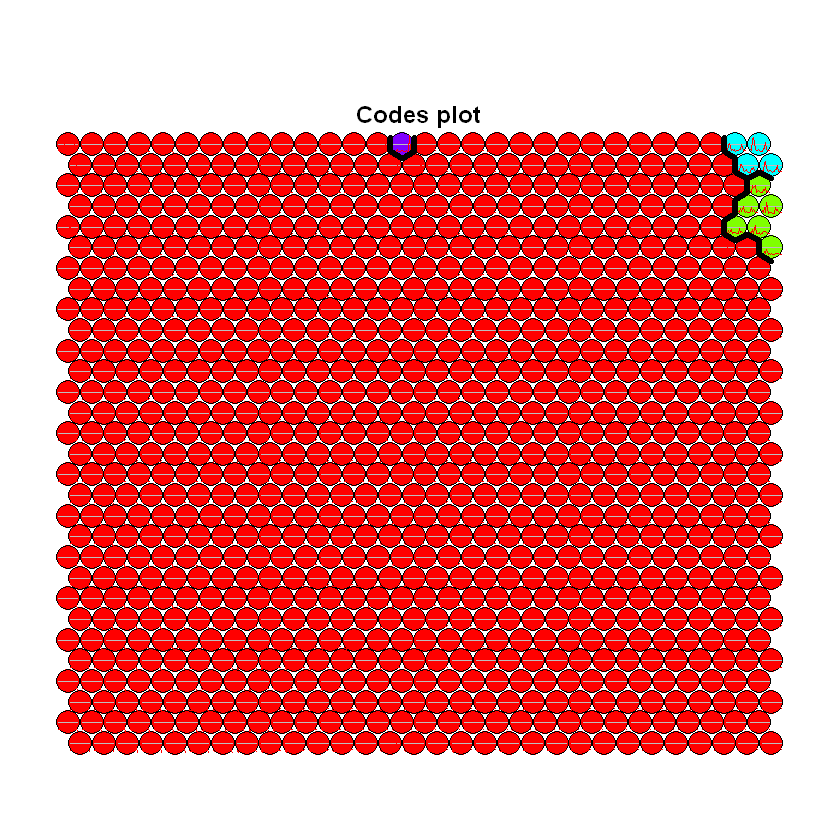

In [26]:
set_cluster <- 4
som_model.hc <- cutree(hclust(dist(som_model$codes[[1]])), set_cluster)
train_cluster <- as.factor(as.vector(som_model.hc[som_model$unit.classif]))
plot(som_model, type="codes", bgcol=rainbow(set_cluster)[som_model.hc])
add.cluster.boundaries(som_model, som_model.hc)

In [27]:
train.l.sc <- list(x=as.matrix(train_data),y=train_cluster)

In [28]:
mygrid = somgrid(30, 30, "hexagonal")
som2 <- supersom(train.l.sc, grid = mygrid, maxNA.fraction = .5)

In [29]:
test.l.sc <- list(x = as.matrix(test_data))

In [30]:
test.pred <- predict(som2, 
                     newdata = test.l.sc)

In [ ]:
head(test.pred)

In [32]:
train_final <- cbind(data.frame(train_data),cluster=train_cluster)
test_final <- cbind(data.frame(test_data),cluster=test.pred$predictions$y)

In [33]:
by(train_final, train_final$cluster, summary)
by(test_final, test_final$cluster, summary)

train_final$cluster: 1
    BALANCE          BALANCE_FREQUENCY     PURCHASES        ONEOFF_PURCHASES  
 Min.   :-0.751598   Min.   :-3.703064   Min.   :-0.46953   Min.   :-0.35691  
 1st Qu.:-0.690908   1st Qu.: 0.049042   1st Qu.:-0.45361   1st Qu.:-0.35691  
 Median :-0.332152   Median : 0.518055   Median :-0.30164   Median :-0.33944  
 Mean   :-0.009165   Mean   :-0.000748   Mean   :-0.05036   Mean   :-0.04049  
 3rd Qu.: 0.217249   3rd Qu.: 0.518055   3rd Qu.: 0.03046   3rd Qu.:-0.02255  
 Max.   : 8.133954   Max.   : 0.518055   Max.   : 6.29578   Max.   : 7.15109  
 INSTALLMENTS_PURCHASES  CASH_ADVANCE       PURCHASES_FREQUENCY 
 Min.   :-0.45455       Min.   :-0.466759   Min.   :-1.2216898  
 1st Qu.:-0.45455       1st Qu.:-0.466759   1st Qu.:-1.0140688  
 Median :-0.35550       Median :-0.466759   Median : 0.0240412  
 Mean   :-0.04471       Mean   : 0.001549   Mean   :-0.0001988  
 3rd Qu.: 0.05245       3rd Qu.: 0.060778   3rd Qu.: 1.0621513  
 Max.   : 6.35515       Max.   :13

test_final$cluster: 1
    BALANCE         BALANCE_FREQUENCY     PURCHASES        ONEOFF_PURCHASES   
 Min.   :-0.75160   Min.   :-3.703064   Min.   :-0.46953   Min.   :-0.356914  
 1st Qu.:-0.69098   1st Qu.: 0.049042   1st Qu.:-0.44816   1st Qu.:-0.356914  
 Median :-0.34550   Median : 0.518055   Median :-0.30278   Median :-0.329412  
 Mean   :-0.01547   Mean   :-0.005518   Mean   :-0.04149   Mean   :-0.030758  
 3rd Qu.: 0.22283   3rd Qu.: 0.518055   3rd Qu.: 0.06320   3rd Qu.:-0.009243  
 Max.   : 7.08152   Max.   : 0.518055   Max.   : 6.88037   Max.   : 8.206917  
 INSTALLMENTS_PURCHASES  CASH_ADVANCE       PURCHASES_FREQUENCY
 Min.   :-0.45455       Min.   :-0.466759   Min.   :-1.22169   
 1st Qu.:-0.45455       1st Qu.:-0.466759   1st Qu.:-1.01407   
 Median :-0.36683       Median :-0.466759   Median :-0.08921   
 Mean   :-0.04145       Mean   :-0.005106   Mean   :-0.01855   
 3rd Qu.: 0.05423       3rd Qu.: 0.085115   3rd Qu.: 1.06215   
 Max.   : 6.74196       Max.   :22.009887

Warning message:
"Use of `train_final$cluster` is discouraged.
ℹ Use `cluster` instead."


Warning message:
"Use of `train_final$cluster` is discouraged.
ℹ Use `cluster` instead."
Warning message:
"Use of `train_final$cluster` is discouraged.
ℹ Use `cluster` instead."
Warning message:
"Use of `train_final$cluster` is discouraged.
ℹ Use `cluster` instead."


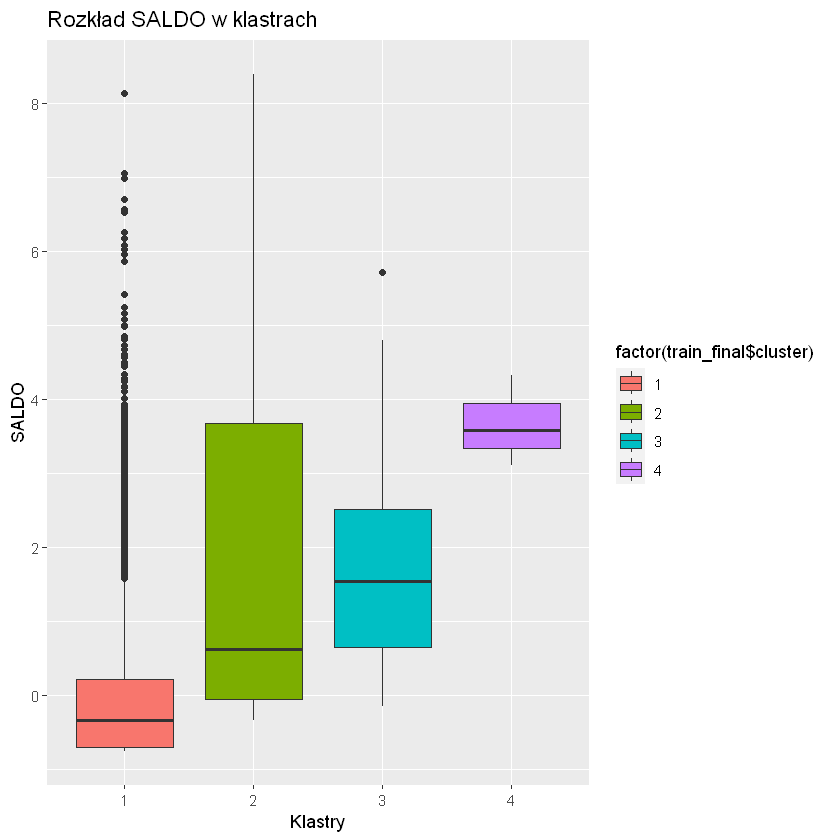

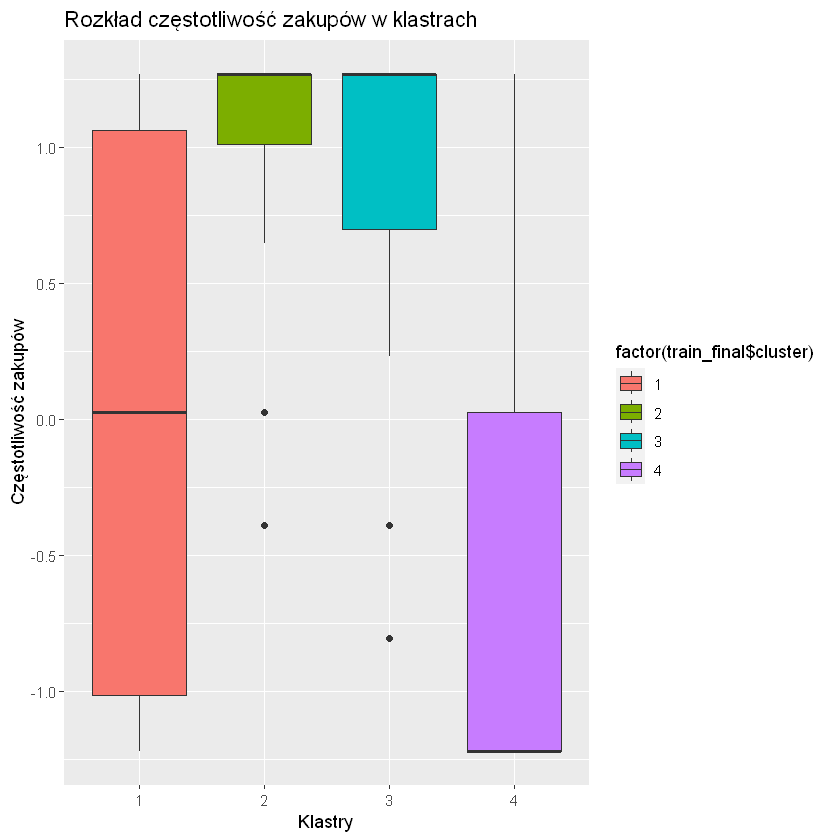

In [37]:
library(ggplot2)

ggplot(train_final, aes(x = factor(train_final$cluster), y = BALANCE, fill = factor(train_final$cluster))) +
  geom_boxplot() +
  labs(title = "Rozkład SALDO w klastrach", x = "Klastry", y = "SALDO")

ggplot(train_final, aes(x = factor(train_final$cluster), y = PURCHASES_FREQUENCY, fill = factor(train_final$cluster))) +
  geom_boxplot() +
  labs(title = "Rozkład częstotliwość zakupów w klastrach", x = "Klastry", y = "Częstotliwość zakupów")

Na podstawie wykonanego zadania i wykresów pomocniczych możemy wyróżnić 4 profile klientów:
 - 1 średnie saldo klientów jest na minusie i częstotliwość zakupów w tej grupie waha sie bardzo, natomiast średnia zakupów wynosi 0, zatem mogą to być klienci, którzy zarabiają bardzo mało i nawet czasem może im nie starczać do kolejnej wypłaty i ich saldo jest ujemne
 - 2 grupa która zarabia na tyle wystarczająco, że ich saldo w bardzo dużej części jest zawsze na plusie, często dokonują zakupów
 - 3 grupa w której saldo jest zawsze na plusie, natomiast zdarzają się rzadko wyjątki, często dokonują zakupów
 - 4 grupa ludzi, którzy nie mają czasu na zakupy, prawdopodobnie ich zakupy głównie polegają na rzeczach użytku codziennego, ich saldo jest zawsze dodatnie. Może to wynika z ich codziennego trybu życia (pracoholicy) lub ludzie na dorobku 